## Importing the necessary modules.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading our dataset.

In [2]:
pd.set_option('display.max_columns',None)
covid = pd.read_csv("Covid Data.csv")
covid.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


Here 1 means Yes and 2 means No.
values as 97 and 99 are missing data.
sex: 1 for female and 2 for male.


# Some information about The Dataset before going further
#### This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,575 unique patients.

* sex: female or male
* age: of the patient.
* classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
* degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* patient type: hospitalized or not hospitalized.
* pneumonia: whether the patient already have air sacs inflammation or not.
* pregnancy: whether the patient is pregnant or not.
* diabetes: whether the patient has diabetes or not.
* copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
* asthma: whether the patient has asthma or not.
* inmsupr: whether the patient is immunosuppressed or not.
* hypertension: whether the patient has hypertension or not.
* cardiovascular: whether the patient has heart or blood vessels related disease.
* renal chronic: whether the patient has chronic renal disease or not.
* other disease: whether the patient has other disease or not.
* obesity: whether the patient is obese or not.
* tobacco: whether the patient is a tobacco user.
* usmr: Indicates whether the patient treated medical units of the first, second or third level.
* medical unit: type of institution of the National Health System that provided the care.
* intubed: whether the patient was connected to the ventilator.
* icu: Indicates whether the patient had been admitted to an Intensive Care Unit.

## Checking data types and null value count.

In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

According to this info we got no null values are there but as we know 97 and 99 are the missing values here.
We have to do something for this.

In [4]:
for i in covid.columns:
    print(covid[i].value_counts())

2    662903
1    385672
Name: USMER, dtype: int64
12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64
1    525064
2    523511
Name: SEX, dtype: int64
1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64
9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
12/10/2020         1
31/10/2020         1
04/01/2020         1
17/12/2020         1
13/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64
97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64
2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64
30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
115        2
114        2
113        1
111        1
121        1
Name: AGE, Length: 121, dtype: int64
97    523511
2     513179
1       8131
9

Now we can see that the columns [INTUBED,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU] are containing missing values and especially columns [ICU,PREGNANT,INTUBED] have very large amount of missing data.

## Data Pre-Processing.

In [5]:
covid = covid[(covid.PNEUMONIA == 1) | (covid.PNEUMONIA == 2)]
covid = covid[(covid.DIABETES == 1) | (covid.DIABETES == 2)]
covid = covid[(covid.COPD == 1) | (covid.COPD == 2)]
covid = covid[(covid.ASTHMA == 1) | (covid.ASTHMA == 2)]
covid = covid[(covid.INMSUPR == 1) | (covid.INMSUPR == 2)]
covid = covid[(covid.HIPERTENSION == 1) | (covid.HIPERTENSION == 2)]
covid = covid[(covid.OTHER_DISEASE == 1) | (covid.OTHER_DISEASE == 2)]
covid = covid[(covid.CARDIOVASCULAR == 1) | (covid.CARDIOVASCULAR == 2)]
covid = covid[(covid.OBESITY == 1) | (covid.OBESITY == 2)]
covid = covid[(covid.RENAL_CHRONIC == 1) | (covid.RENAL_CHRONIC == 2)]
covid = covid[(covid.TOBACCO == 1) | (covid.TOBACCO == 2)]

In [6]:
covid.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


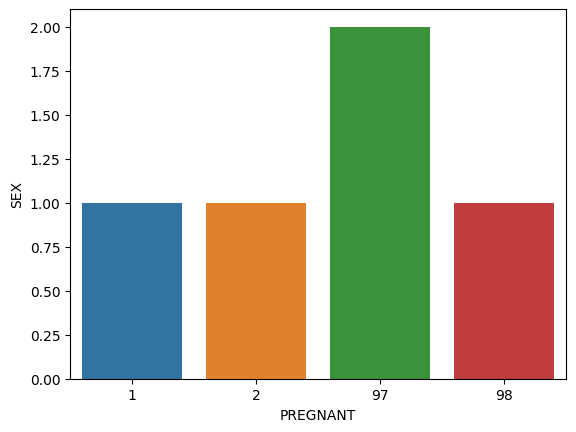

In [7]:
fig = sns.barplot(x=covid['PREGNANT'],y=covid['SEX'])
plt.show()

Here we see while plotting the barplot in between Pregnant and Sex, 97 is pointing towards 2 which is for male which is false. so converting 97 into 1.

In [8]:
covid.PREGNANT = covid['PREGNANT'].replace(97,2)

In [9]:
covid = covid[(covid['PREGNANT']==1) | (covid['PREGNANT']==2)]

In [10]:
covid['DATE_DIED'].value_counts()
# HERE 9999-99-99 is for alive.
# so now

9999-99-99    947320
06/07/2020       984
07/07/2020       981
13/07/2020       969
16/06/2020       965
               ...  
26/02/2021         1
09/01/2020         1
07/01/2020         1
31/03/2021         1
13/04/2021         1
Name: DATE_DIED, Length: 395, dtype: int64

#### Performing some feature engineering.

In [11]:
covid['DEAD'] = [2 if all=='9999-99-99' else 1 for all in covid.DATE_DIED ]

<AxesSubplot:xlabel='INTUBED', ylabel='count'>

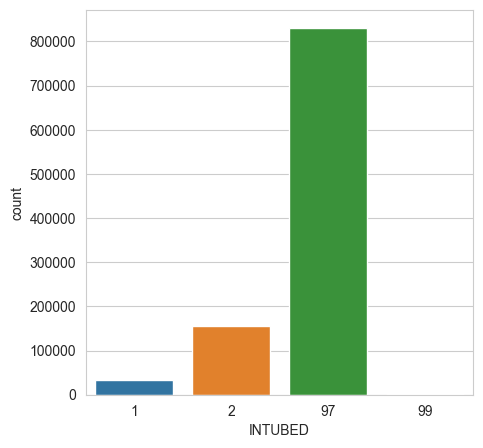

In [12]:
plt.figure(figsize=(5,5))
sns.set_style('whitegrid')
sns.countplot(covid,x='INTUBED')

<AxesSubplot:xlabel='ICU', ylabel='count'>

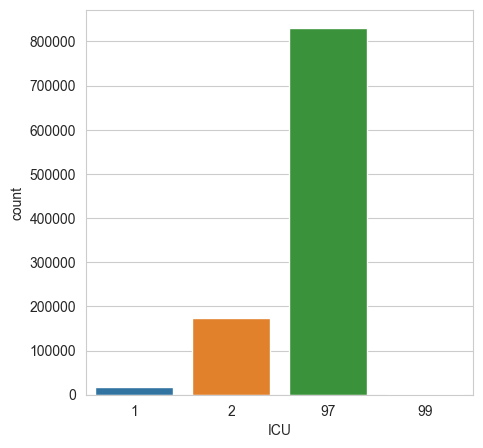

In [13]:
plt.figure(figsize=(5,5))
sns.set_style('whitegrid')
sns.countplot(covid,x='ICU')

Both columns ICU and INTUBED have very large amount of missing values,better to drop these columns.

In [14]:
covid = covid.drop('ICU',axis=1)

In [15]:
covid.drop('INTUBED',axis=1,inplace=True)

Also no need of DATE_DIED column as we created DEAD Column ,so let's drop this also.

In [16]:
covid.drop(columns=['DATE_DIED'],axis=1,inplace=True)

#### These above are the three different techniques to drop columns.

In [17]:
covid.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEAD
0,2,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,3,1
1,2,1,2,1,1,72,2,2,2,2,2,1,2,2,1,1,2,5,1
2,2,1,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,3,1
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,7,1
4,2,1,2,1,2,68,2,1,2,2,2,1,2,2,2,2,2,3,1


## Data Visualisation.

#### Let's check death count of both males and females with respect to their age.

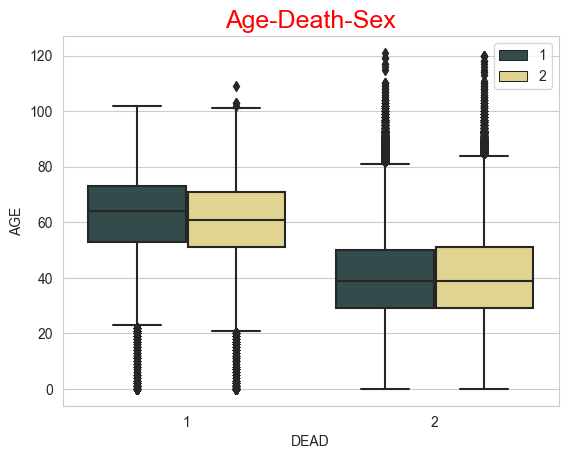

In [18]:
sns.boxplot(x="DEAD", y="AGE",hue="SEX",data=covid,palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Age-Death-Sex",fontsize=18, color="red")
plt.legend()
plt.show()

- ```Here We See that```:

  - People having Age 58-76 could not survived Pandemic.
  
  - No matter Male or Female both were nearly equal in pandemic.
  
  - Lesser Age People Survived(Immunity comes into play).

#### Let's go more deeper and check male female death count more accurately.

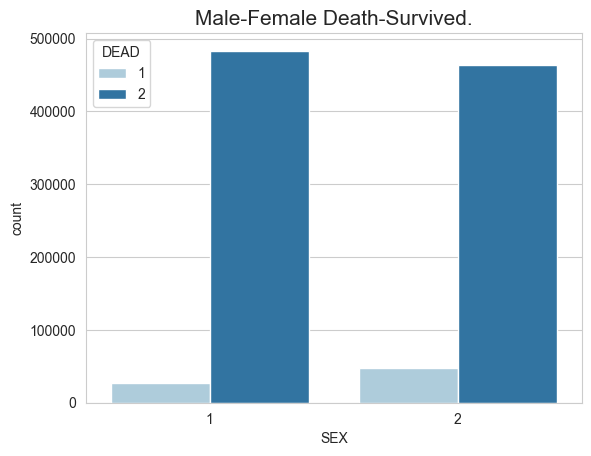

In [19]:
sns.countplot(data=covid,x='SEX',hue='DEAD',palette=sns.color_palette("Paired"))
plt.title('Male-Female Death-Survived.',size=15)
plt.show()

### Now we can say that there is a clear **Difference**:
- More Men Died
- Less Men Survived.

#### If we check the count of Male and Female we would be done here.

In [20]:
covid['SEX'].value_counts()

2    511936
1    510041
Name: SEX, dtype: int64

#### Not a huge difference in the count , by this we can say that:
  - Women Have Strong Immune System as compared to Men.

### Age Distribution Check

Text(0.5, 1.0, 'Age-Distribution')

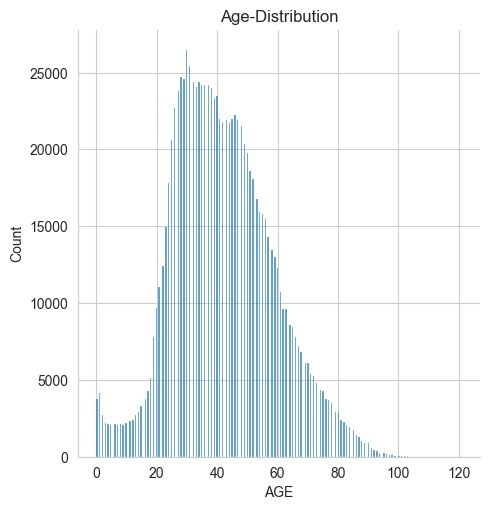

In [21]:
sns.displot(covid.AGE)
plt.title('Age-Distribution')

- Most of the patients were aged in between **20-70** 
- the distribution is quite normal but towards the right or  **Positive-Distribution**

### Checking the correlation.

<AxesSubplot:>

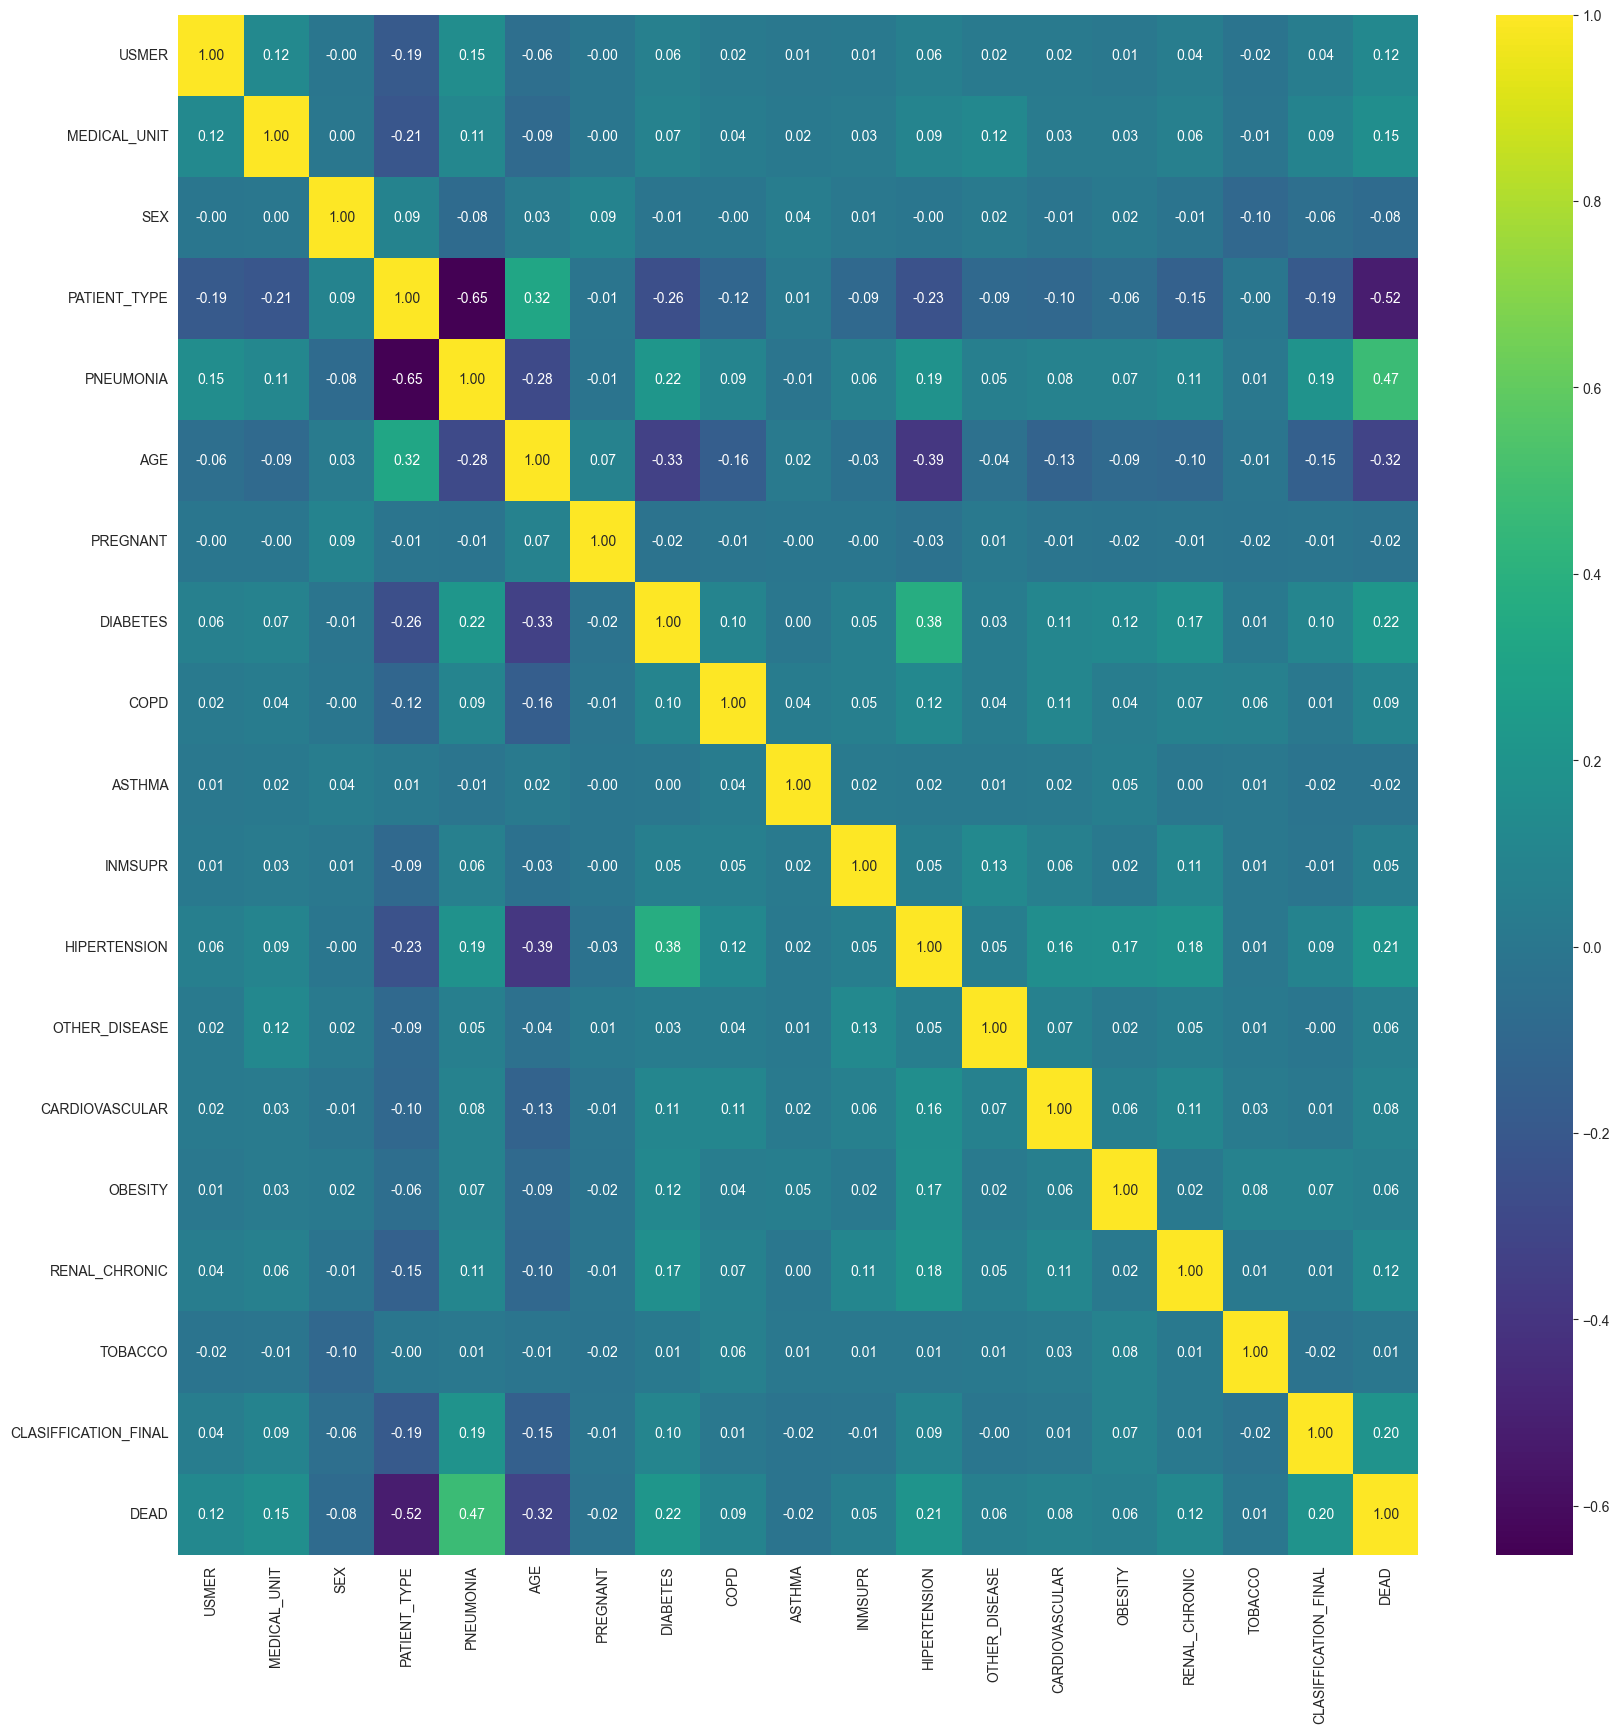

In [22]:
plt.figure(figsize=(20,20))
corr = covid.corr()
sns.heatmap(corr,annot=True,cmap='viridis',fmt='.2f')

#### Correlation between Pneumonia and Dead is 0.47 let's visualize it to be more clear.

<Figure size 1000x1000 with 0 Axes>

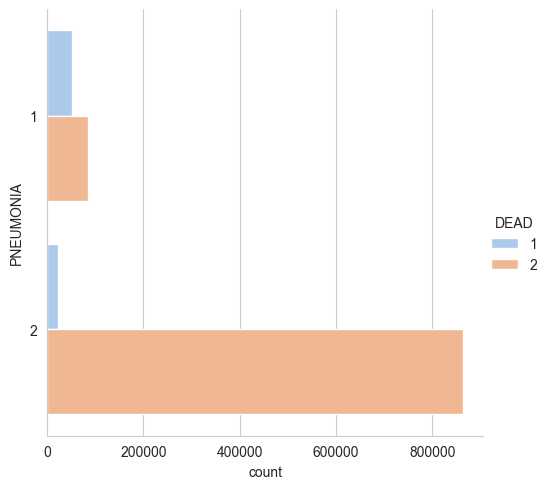

In [23]:
plt.figure(figsize=(10,10))
sns.catplot(data=covid,y='PNEUMONIA',hue='DEAD',kind='count',palette='pastel')

#### Yes from this we clearly can say that the one who was having Pneumonia had very less chance of survival very less.

<Figure size 1000x1000 with 0 Axes>

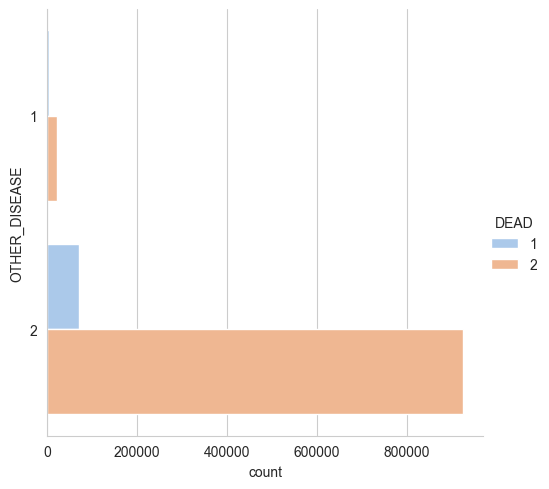

In [24]:
plt.figure(figsize=(10,10))

sns.catplot(data=covid,y='OTHER_DISEASE',hue='DEAD',kind='count',palette='pastel')

#### Other Diseases does not have so much of impact as we can see here.

### Preparing X and y.

#### We will reject the features which have very less or negligible correlation with the Target value.

In [25]:
dropping = ["SEX","PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR","OBESITY","TOBACCO"]
covid = covid.drop(columns=dropping,axis=1)
covid.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEAD
0,2,1,1,1,65,2,1,2,3,1
1,2,1,1,1,72,2,1,1,5,1
2,2,1,2,2,55,1,2,2,3,1
3,2,1,1,2,53,2,2,2,7,1
4,2,1,1,2,68,1,1,2,3,1


#### Here every value is scaled or categorical except for AGE, standardizing AGE Column:

In [26]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
covid['AGE'] = ss.fit_transform(covid.AGE.values.reshape(-1,1))

## OK.

In [27]:
for i in covid.columns:
    print(covid[i].value_counts())

2    656118
1    365859
Name: USMER, dtype: int64
12    589209
4     306967
6      37791
9      37142
3      18646
8      10091
10      7538
5       7049
11      5553
7        870
13       811
2        159
1        151
Name: MEDICAL_UNIT, dtype: int64
1    830385
2    191592
Name: PATIENT_TYPE, dtype: int64
2    884614
1    137363
Name: PNEUMONIA, dtype: int64
-0.710190    26456
-0.650487    25419
-0.829596    24735
-0.769893    24595
-0.471377    24406
             ...  
 4.603393        2
 4.424283        2
 4.722799        1
 4.245174        1
 4.125767        1
Name: AGE, Length: 121, dtype: int64
2    899805
1    122172
Name: DIABETES, dtype: int64
2    862715
1    159262
Name: HIPERTENSION, dtype: int64
2    1003657
1      18320
Name: RENAL_CHRONIC, dtype: int64
7    488706
3    377378
6    117342
5     25245
1      8417
4      3088
2      1801
Name: CLASIFFICATION_FINAL, dtype: int64
2    947320
1     74657
Name: DEAD, dtype: int64


#### Medical unit and Classification Final have 13 and 7 categorical values respectively.
- Creatin Dummies.

In [28]:
covid = pd.get_dummies(covid,columns=["MEDICAL_UNIT","CLASIFFICATION_FINAL"],drop_first=True)

In [29]:
X= covid.drop('DEAD',axis=1)
y = covid.DEAD

## Training and Testing.

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=1)
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

X_train : (715383, 25)
X_test : (306594, 25)
y_train : (715383,)
y_test : (306594,)


### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

c:\users\jatin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [32]:
print("Logistic Regression Accuracy :",logreg.score(X_test, y_test))

Logistic Regression Accuracy : 0.9394867479467961


In [33]:
predictions = logreg.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix,f1_score

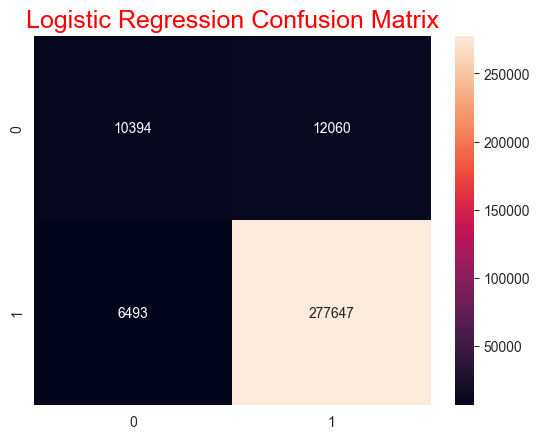

In [37]:
sns.heatmap(confusion_matrix(y_test, logreg.predict(X_test)), annot=True, fmt=".0f")
plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="red");

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.62      0.46      0.53     22454
           2       0.96      0.98      0.97    284140

    accuracy                           0.94    306594
   macro avg       0.79      0.72      0.75    306594
weighted avg       0.93      0.94      0.94    306594



#### Our Model has Predicted the Survived Count very efficiently but it suffered in Predicting Death Count.

### Decision Tree Classifier.

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
dt = DecisionTreeClassifier()
model = dt.fit(X_train,y_train)

In [41]:
pre = model.predict(X_test)

In [42]:
model.score(X_test,y_test)

0.9346236390796949

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pre))

              precision    recall  f1-score   support

           1       0.56      0.50      0.53     22454
           2       0.96      0.97      0.96    284140

    accuracy                           0.93    306594
   macro avg       0.76      0.74      0.75    306594
weighted avg       0.93      0.93      0.93    306594



### Still the same Problem.

In [44]:
from collections import Counter
print(sorted(Counter(covid['DEAD']).items()))

[(1, 74657), (2, 947320)]


In [45]:
print(covid.shape)

(1021977, 26)


### Comes the problem:- _Dataset_ is highly **imbalanced**.
- Differnce in the count of 1's and 2's is very huge.
  - We have to solve this first before going further.
 
 
## A visual representation of this using Hexbin.

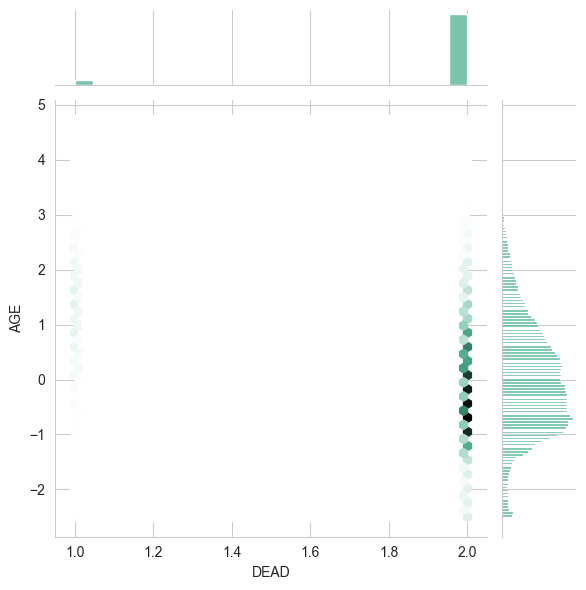

In [46]:
sns.jointplot(x='DEAD',y='AGE',data=covid, kind="hex", color="#4CB391");

In [47]:
!pip install imblearn


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x_resampled,y_resampled = rus.fit_resample(X,y)

In [63]:
train_x, test_x, train_y, test_y = train_test_split(x_resampled,y_resampled, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (119451, 25)
Test_x : (29863, 25)
Train_y : (119451,)
Test_y : (29863,)


In [64]:
logreg = LogisticRegression()
logreg.fit(train_x,train_y)
print("Logistic Regression Accuracy :",logreg.score(test_x, test_y))

Logistic Regression Accuracy : 0.9052004152295483


c:\users\jatin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [65]:
print("Logistic Regression F1 Score :",f1_score(test_y,logreg.predict(test_x),average=None))

Logistic Regression F1 Score : [0.90619926 0.90418006]


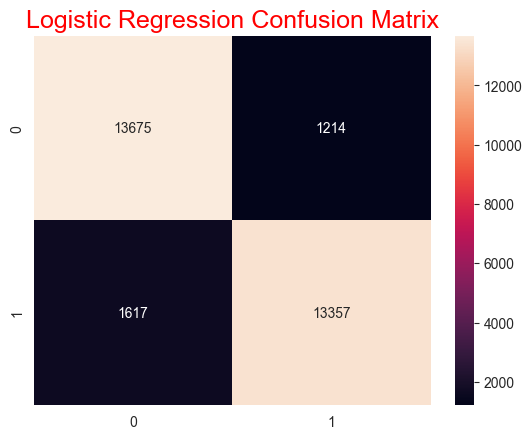

In [66]:
sns.heatmap(confusion_matrix(test_y, logreg.predict(test_x)), annot=True, fmt=".0f")
plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="red");

## We could have gone for OverSampling but as our dataset contains more than 10lac of rows it would have increased this count by a descent number.
### That's why i used Under Sampling Here.

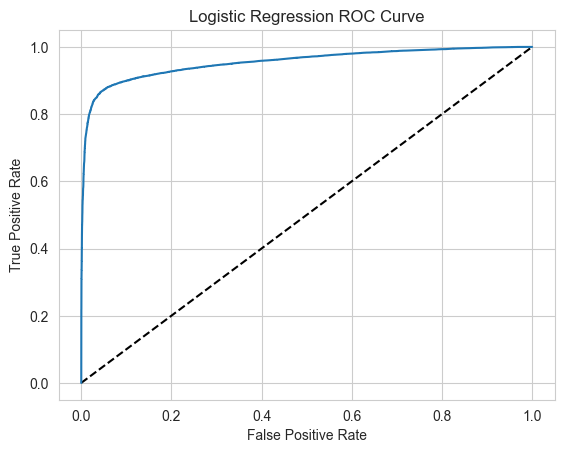

In [67]:
from sklearn.metrics import roc_curve
test_y = test_y.replace({2:1,1:0})
# Probabilities
logreg_pred_proba = logreg.predict_proba(test_x)

fpr, tpr, thresholds = roc_curve(test_y, logreg_pred_proba[:,1])
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

## Conclusion:-
 - Here i got 90.5 accuracy Score and 90.4 f1_score.
 - First we predicted survived count very good but failed in prediction of death.
 - Main problem was imbalanced dataset which we solved with *under-sampling*
 - That's all.